In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [14]:
train_data = pd.read_csv('final_data.csv')

In [3]:
train_data.head()

Unnamed: 0                             address  ...  zipcode        zpid
0           2  Address: 1160 Mission Street #2007  ...  94103.0  83152781.0
1           5       Address: 260 King Street #475  ...  94107.0  69819817.0
2           7     Address: 560 Missouri Street #B  ...  94107.0  64972847.0
3           9        Address: 350 Missouri Street  ...  94107.0  15149489.0
4          11         Address: 3658 Folsom Street  ...  94110.0  15161978.0

[5 rows x 19 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [5]:
train_data.loc[:, 'info'].value_counts()

 San FranciscoSales price: 1950000Sales date: 02/05/2016Bedrooms: 2Square feet: 1463Lot size: 3582    3
 San FranciscoSales price: 1250000Sales date: 02/08/2016Bedrooms: 3Square feet: 1703Lot size: 2805    3
 San FranciscoSales price: 2350000Sales date: 02/05/2016Bedrooms: 3Square feet: 2650Lot size: 2622    3
 San FranciscoSales price: 725000Sales date: 02/05/2016Bedrooms: 3Square feet: 1297Lot size: 3070     3
 San FranciscoSales price: 609000Sales date: 02/05/2016Bedrooms: 0Square feet: 1200Lot size: 2661     3
                                                                                                     ..
 San FranciscoSales price: 1300000Sales date: 09/30/2014Bedrooms: 0Square feet: 1872Lot size: 2500    1
 San FranciscoSales price: 893000Sales date: 10/25/2013Bedrooms: 2Square feet: 1201Lot size: 5300     1
 San FranciscoSales price: 790000Sales date: 04/02/2014Bedrooms: 2Square feet: 1198Lot size: 2845     1
 San FranciscoSales price: 533000Sales date: 12/24/2012Bedrooms:

In [7]:
train_data.loc[:, 'address'].value_counts()

Address: 1300 Eddy Street            5
Address: 370 Church Street #F        4
Address: 1015 Ashbury Street #2      4
Address: 1211 Dolores Street         3
Address: 737 Tehama Street #1        3
                                    ..
Address: 201 Harrison Street #608    1
Address: 1923 44th Avenue            1
Address: 746 48th Avenue             1
Address: 2250 24th Street #223       1
Address: 100 9th Avenue              1
Name: address, Length: 10730, dtype: int64

In [8]:
train_data.loc[:, 'z_address'].value_counts()

1300 Eddy St                 5
410 Jessie St STE 701        4
1015 Ashbury St APT 2        4
370 Church St APT F          4
79 Seward St                 3
                            ..
3228 Clay St                 1
797 Athens St                1
215 Red Rock Way APT 301J    1
656 Teresita Blvd            1
722 Wisconsin St             1
Name: z_address, Length: 10684, dtype: int64

In [9]:
train_data.loc[:, 'lastsolddate'].value_counts()

08/30/2013    46
11/08/2013    46
05/29/2015    40
10/17/2014    39
07/31/2015    39
              ..
03/27/1992     1
09/29/2003     1
05/02/2003     1
07/13/2006     1
05/23/2013     1
Name: lastsolddate, Length: 954, dtype: int64

In [10]:
train_data.loc[:, 'neighborhood'].value_counts()

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [11]:
train_data.loc[:, 'usecode'].value_counts()

SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Cooperative            3
Apartment              3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

In [12]:
train_data.loc[:, 'zindexvalue'].value_counts()

1,167,700    469
1,214,400    457
957,300      454
1,269,100    406
1,884,400    385
            ... 
1,565,000      5
1,390,900      3
750,300        3
4,464,800      2
757,700        1
Name: zindexvalue, Length: 139, dtype: int64

In [15]:
train_data.drop(['address', 'lastsolddate', 'neighborhood', 'info', 'Unnamed: 0', 'z_address', 'usecode', 'zindexvalue'], axis=1, inplace=True)

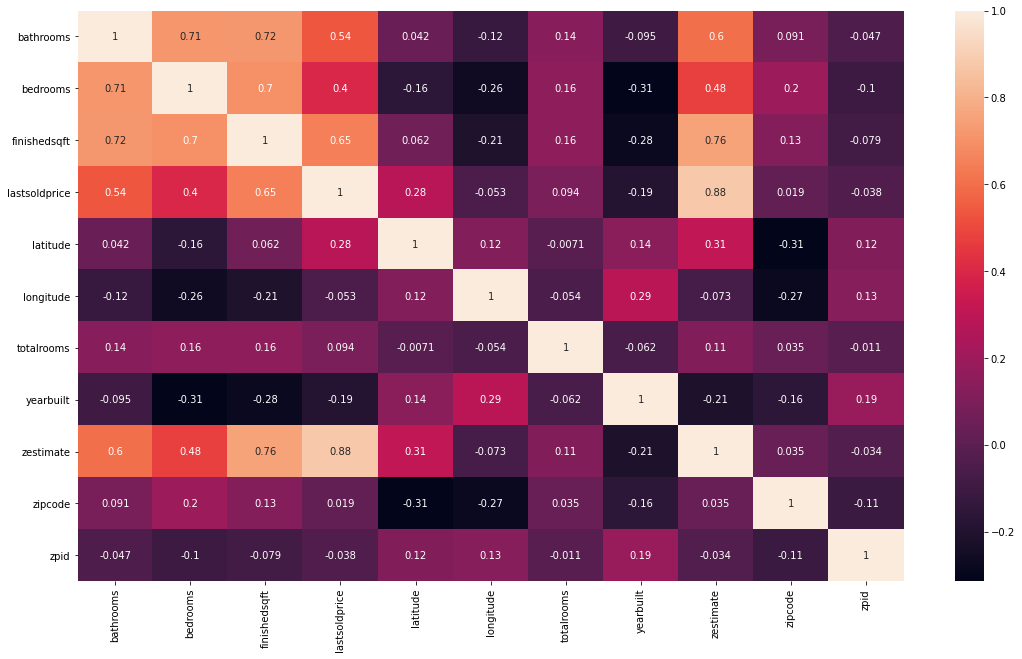

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = train_data.corr()
fig = sns.heatmap(cm, annot=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


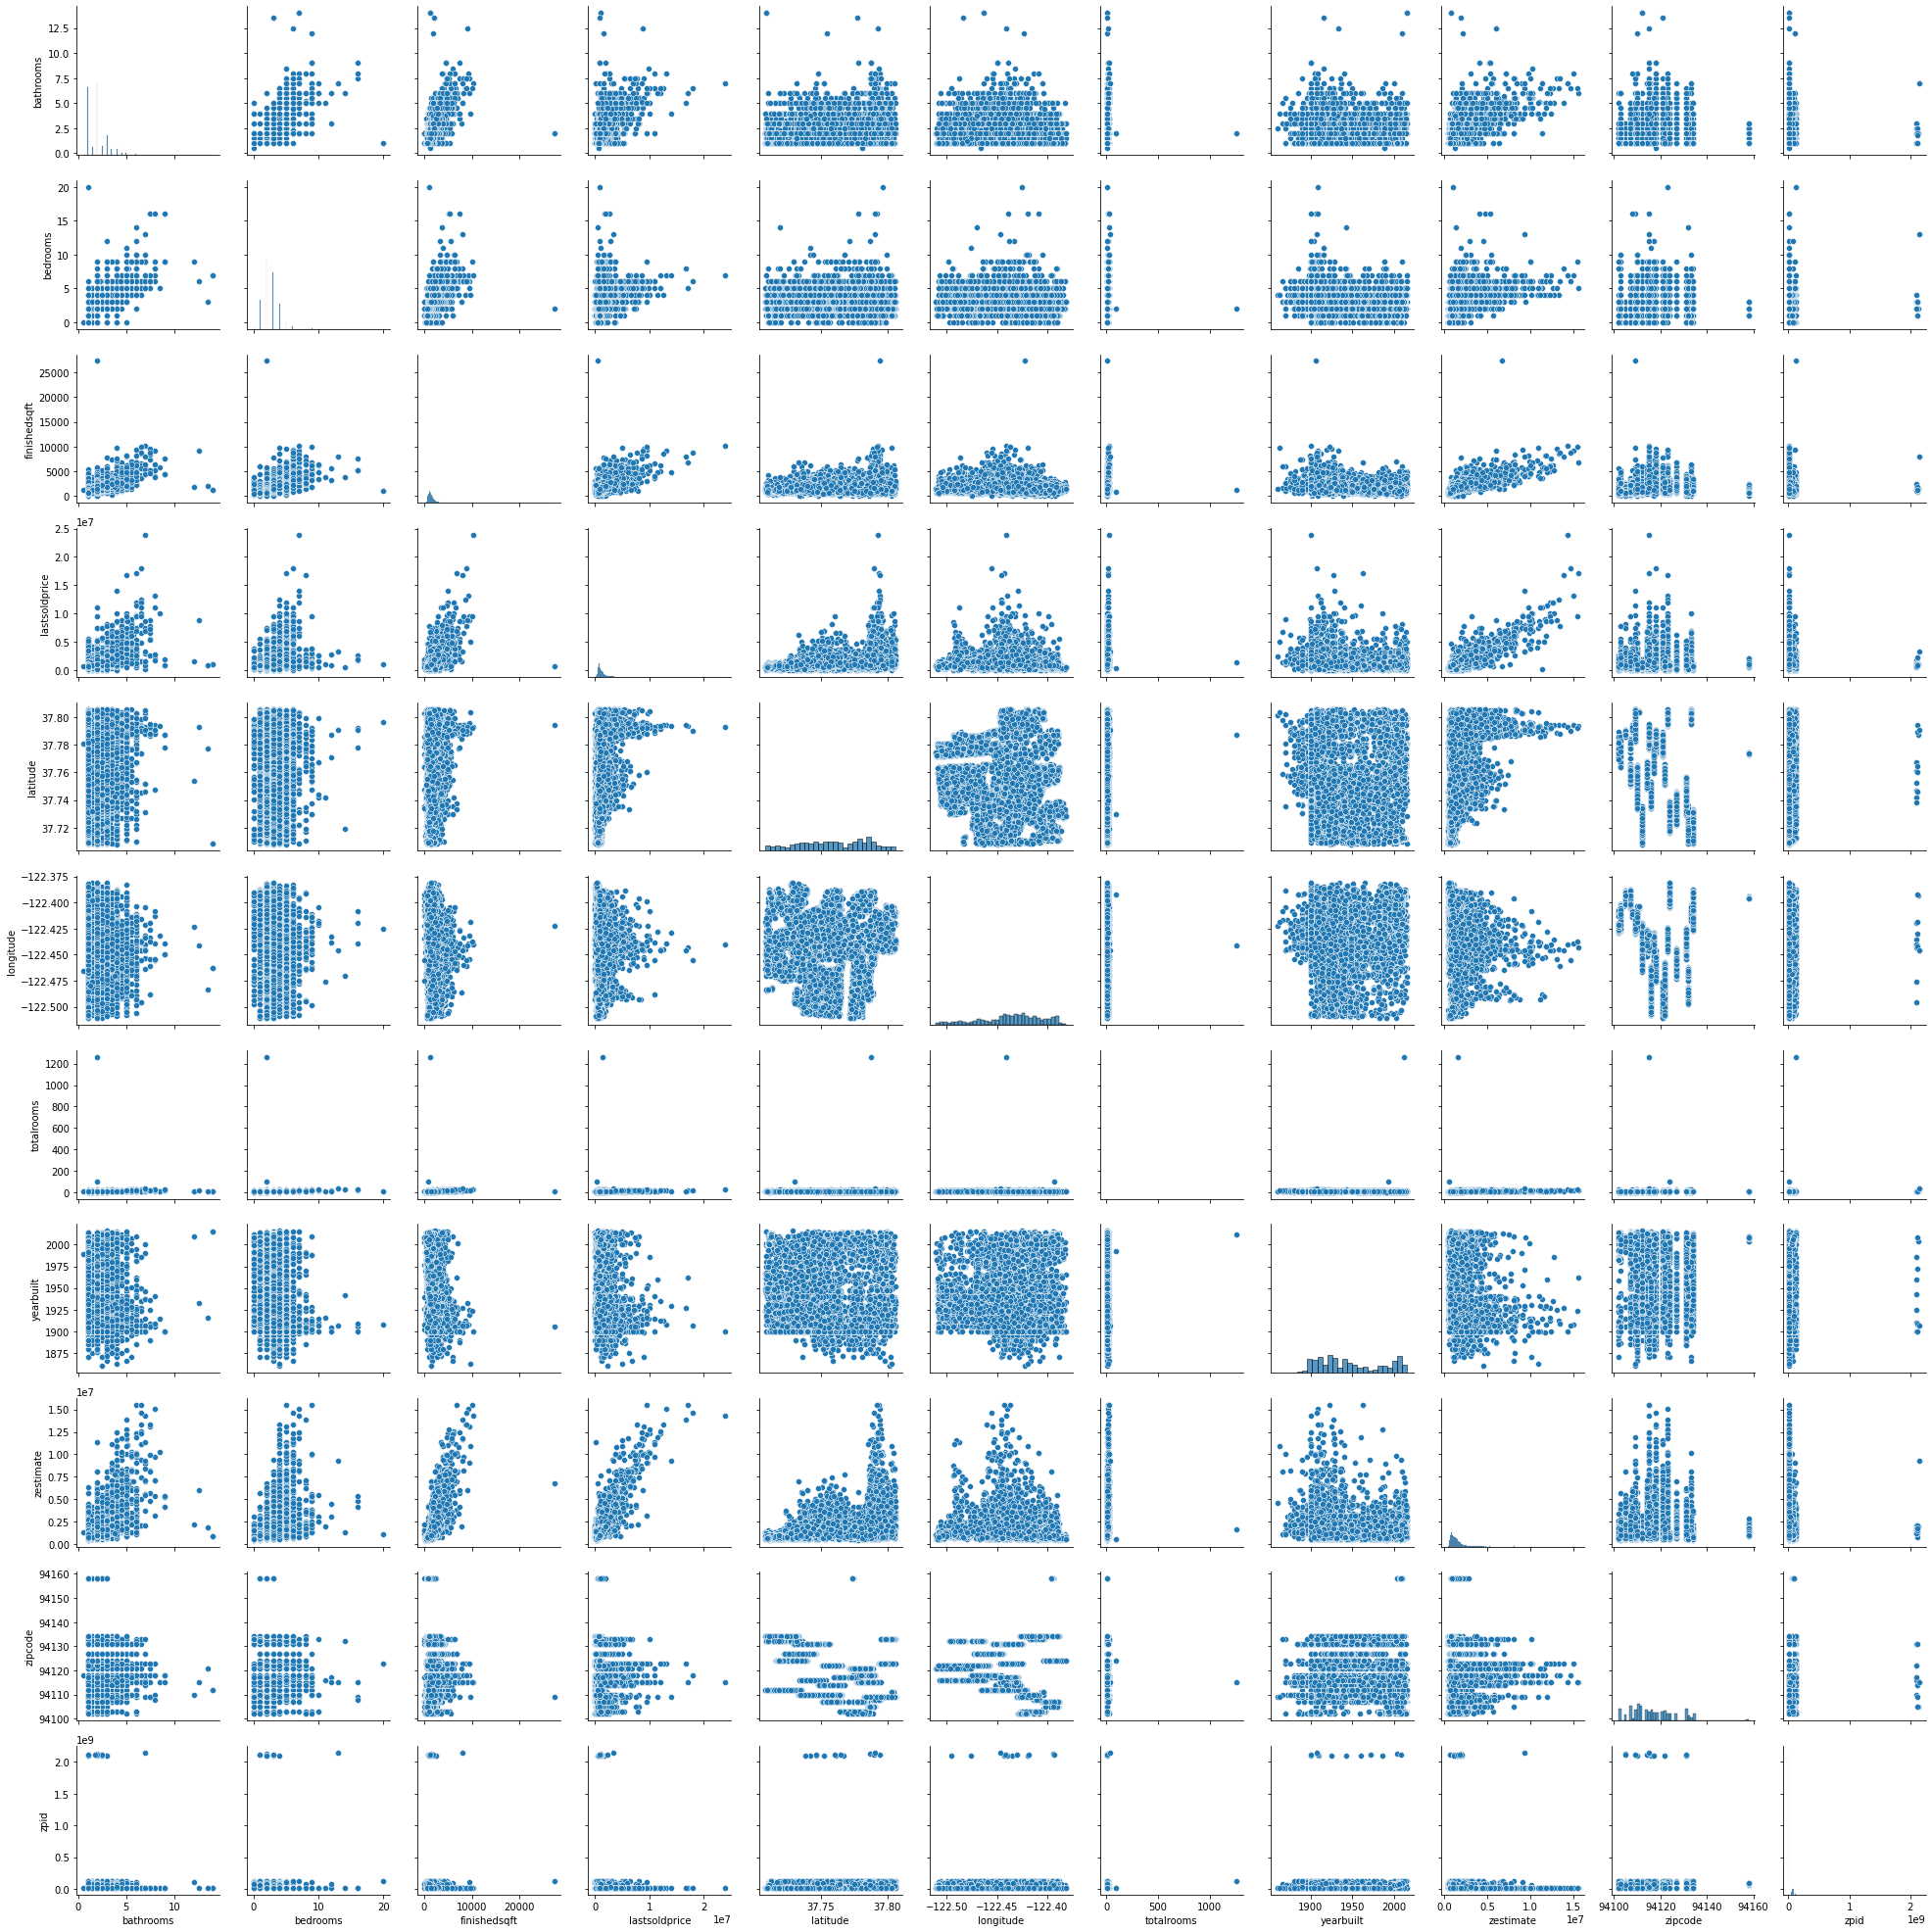

In [17]:
sns.pairplot(train_data, size=2.5)
plt.tight_layout()

In [18]:
X = train_data[['bathrooms',	'bedrooms',	'finishedsqft',	'zestimate']]
y = train_data['lastsoldprice']

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.7713426145835333

In [20]:
model.predict(X)

array([1012092.02783936,  733615.03463281, 1488399.23008025, ...,
        559299.25405166,  616840.6813104 ,  795589.28606757])

In [21]:
X = train_data[['bathrooms',	'bedrooms',	'finishedsqft',	'zestimate', 'latitude', 'totalrooms',	'longitude', 'zipcode', 'zpid', 'yearbuilt']]
y = train_data['lastsoldprice']

In [22]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.7719441838613196

In [23]:
model.predict(X)

array([ 988261.80262199,  712395.1365691 , 1476619.39412029, ...,
        560164.26938839,  638812.50161691,  786478.86412726])

In [25]:
X = train_data[['latitude', 'totalrooms',	'longitude', 'zipcode', 'zpid', 'yearbuilt']]
y = train_data['lastsoldprice']

In [26]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.148045366862401

In [27]:
model.predict(X)

array([1020776.75589681, 1060917.41544175,  830143.02740479, ...,
        494290.48316717, 1508645.54113102,  693719.26918316])

In [28]:
train = pd.read_csv('final_data.csv')

In [29]:
train.drop(['address', 'lastsolddate', 'info', 'Unnamed: 0', 'z_address', 'usecode', 'zindexvalue'], axis=1, inplace=True)

In [32]:
train = pd.get_dummies(train, columns=['neighborhood'])

In [33]:
X = train[['neighborhood_Bayview',	'neighborhood_Bernal Heights',	'neighborhood_Buena Vista Park',	'neighborhood_Central Richmond',	
'neighborhood_Central Sunset',	'neighborhood_Central Waterfront - Dogpatch',	'neighborhood_Corona Heights',	'neighborhood_Cow Hollow',	'neighborhood_Crocker Amazon',	
'neighborhood_Daly City',	'neighborhood_Diamond Heights',	'neighborhood_Downtown',	'neighborhood_Eureka Valley - Dolores Heights - Castro',	
'neighborhood_Excelsior',	'neighborhood_Forest Hill',	'neighborhood_Forest Hill Extension',	'neighborhood_Glen Park',	'neighborhood_Golden Gate Heights',	
'neighborhood_Haight-Ashbury',	'neighborhood_Hayes Valley',	'neighborhood_Ingleside',	'neighborhood_Ingleside Heights', 'neighborhood_Ingleside Terrace',
'neighborhood_Inner Parkside', 'neighborhood_Inner Richmond', 'neighborhood_Inner Sunset', 'neighborhood_Lake', 'neighborhood_Lakeshore', 'neighborhood_Lakeside',                                   
'neighborhood_Little Hollywood', 'neighborhood_Lone Mountain', 'neighborhood_Lower Pacific Heights','neighborhood_Marina',	'neighborhood_Merced Heights',	
'neighborhood_Midtown Terrace',	'neighborhood_Miraloma Park',	'neighborhood_Mission',	
'neighborhood_Mission Terrace',	'neighborhood_Mount Davidson Manor',	'neighborhood_Nob Hill',	'neighborhood_Noe Valley',	'neighborhood_North Beach',	
'neighborhood_North Panhandle',	'neighborhood_North Waterfront',	'neighborhood_Oceanview',	'neighborhood_Outer Mission',	'neighborhood_Outer Parkside',
'neighborhood_Outer Richmond',	'neighborhood_Outer Sunset',	'neighborhood_Pacific Heights',	'neighborhood_Parkside',	'neighborhood_Parnassus - Ashbury',
'neighborhood_Portola',	'neighborhood_Potrero Hill',	'neighborhood_Presidio Heights',	'neighborhood_Russian Hill',	'neighborhood_Sea Cliff',	
'neighborhood_Silver Terrace',	'neighborhood_South Beach',	'neighborhood_South of Market',	'neighborhood_St. Francis Wood',	'neighborhood_Sunnyside',
'neighborhood_Telegraph Hill',	'neighborhood_Twin Peaks',	'neighborhood_Van Ness - Civic Center',	'neighborhood_Visitacion Valley',	
'neighborhood_West Portal',	'neighborhood_Western Addition',	'neighborhood_Westwood Highlands',	'neighborhood_Westwood Park',	'neighborhood_Yerba Buena']]
y = train['lastsoldprice']

In [34]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.26795871774702384

In [35]:
model.predict(X)

array([ 931584.,  931584., 1207808., ...,  717312.,  865536., 1136128.])

In [36]:
trains = pd.read_csv('final_data.csv')

In [37]:
trains.drop(['address', 'lastsolddate', 'info', 'Unnamed: 0', 'z_address', 'zindexvalue'], axis=1, inplace=True)

In [38]:
trains = pd.get_dummies(trains, columns=['usecode'])

In [39]:
X = trains[['usecode_Apartment',	'usecode_Condominium',	'usecode_Cooperative',	'usecode_Duplex',	'usecode_Miscellaneous',	'usecode_Mobile',	
'usecode_MultiFamily2To4',	'usecode_MultiFamily5Plus',	'usecode_SingleFamily',	'usecode_Townhouse']]
y = trains['lastsoldprice']

In [40]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.02374053697205247

In [41]:
model.predict(X)

array([1083392., 1083392., 1083392., ..., 1413120., 1413120., 1413120.])

In [42]:
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 67.3MB 70kB/s 


In [43]:
X = train_data[['bathrooms',	'bedrooms',	'finishedsqft',	'zestimate']]
y = train_data['lastsoldprice']

In [44]:
model = CatBoostRegressor()
model.fit(X, y)
model.score(X, y)

Learning rate set to 0.060125
0:	learn: 1000517.4875275	total: 52.1ms	remaining: 52s
1:	learn: 961455.2072709	total: 54.5ms	remaining: 27.2s
2:	learn: 925497.6565752	total: 58ms	remaining: 19.3s
3:	learn: 890687.0248734	total: 63ms	remaining: 15.7s
4:	learn: 860345.2485669	total: 68.5ms	remaining: 13.6s
5:	learn: 830972.5835992	total: 71.9ms	remaining: 11.9s
6:	learn: 805076.2113650	total: 74.5ms	remaining: 10.6s
7:	learn: 779159.7672396	total: 77.1ms	remaining: 9.56s
8:	learn: 755501.1376838	total: 79.6ms	remaining: 8.76s
9:	learn: 734287.6554432	total: 82.1ms	remaining: 8.13s
10:	learn: 714558.5876132	total: 84.7ms	remaining: 7.61s
11:	learn: 695764.3060620	total: 87.6ms	remaining: 7.21s
12:	learn: 679437.7333386	total: 92.1ms	remaining: 6.99s
13:	learn: 664595.8547840	total: 95ms	remaining: 6.69s
14:	learn: 650422.2184157	total: 97.8ms	remaining: 6.42s
15:	learn: 637150.6525849	total: 101ms	remaining: 6.2s
16:	learn: 624513.9926964	total: 103ms	remaining: 5.97s
17:	learn: 613455.480

0.8843265067650303